## Importing Dependencies 

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import time 
import matplotlib.pyplot as plt 

import ignore 
warnings.filterwarnings(ignore)


## Loading in Stock Symbols

In [3]:
df = pd.read_csv("Resources/Stock_Code.csv")
sp500 = pd.read_csv("Resources/sp500.csv")

In [4]:
df.head()

,Code,Name,Country,Exchange,Currency,Type,Isin
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
1,AA,Alcoa Corp,USA,NYSE,USD,Common Stock,US0138721065
2,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,US53656F6566
3,AAC,AAC Holdings Inc,USA,NYSE,USD,Common Stock,KYG330321061
4,AAIC,Arlington Asset Investment Corp,USA,NYSE,USD,Common Stock,US0413562051


In [5]:
df.rename({"Code": "Symbol"}, axis = 1, inplace = True)

In [6]:
NYSE = df[(df["Exchange"] == "NYSE") & (df["Type"] == "Common Stock")]

In [7]:
sp500.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [8]:
sp500 = sp500[["Symbol", "Sector"]]

In [9]:
HealthCare = sp500[sp500["Sector"] == "Health Care"]

## Which holds highest precedence? 

-----

Focus on healthcare companies - but first we need to explore which mutiple is best to describe industry. 

In [10]:
combine = pd.merge(NYSE, HealthCare, on = "Symbol")

In [11]:
combine.head()

,Symbol,Name,Country,Exchange,Currency,Type,Isin,Sector
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,Health Care
1,ABBV,AbbVie Inc,USA,NYSE,USD,Common Stock,US00287Y1091,Health Care
2,ABC,AmerisourceBergen,USA,NYSE,USD,Common Stock,US03073E1055,Health Care
3,ABT,Abbott Laboratories,USA,NYSE,USD,Common Stock,US0028241000,Health Care
4,BAX,Baxter International Inc,USA,NYSE,USD,Common Stock,US0718131099,Health Care


## Extraction of  Meta Data to Rank Companies 
-----

* We can have a lot more columns than these, in fact over 50+ columns. I just choose a few - we should probably rank the companies that we would want to invest in based on key statistical insights. 

In [12]:
### Creation of Empty Columns to iterrow

combine["Price/Book"] = ""
combine["PEG Ratio"] = ""
combine["Foward PE"] = ""
combine["Trailing PE"] = ""
combine["Total Debt/Equity"] = ""

for index, row in combine.iterrows():
    
    try:
    
        symbol = yf.Ticker(combine.loc[index, "Symbol"])
    
        print(f"Commence Extraction of {symbol} data")
        time.sleep(2)
        info = symbol.info
        combine.loc[index, "Price/Book"] = info["priceToBook"]
        combine.loc[index, "PEG Ratio"] = info["pegRatio"]
        combine.loc[index, "Foward PE"] = info["forwardPE"]
        combine.loc[index, "Trailing PE"] = info["trailingPE"]
        combine.loc[index, "Total Debt/Equity"] = info["debtToEquity"]
        
        
    except Exception:
        print(f"{symbol} not found")

Commence Extraction of yfinance.Ticker object <A> data
Commence Extraction of yfinance.Ticker object <ABBV> data
Commence Extraction of yfinance.Ticker object <ABC> data
Commence Extraction of yfinance.Ticker object <ABT> data
Commence Extraction of yfinance.Ticker object <BAX> data
Commence Extraction of yfinance.Ticker object <BDX> data
Commence Extraction of yfinance.Ticker object <BIO> data
yfinance.Ticker object <BIO> not found
Commence Extraction of yfinance.Ticker object <BMY> data
Commence Extraction of yfinance.Ticker object <BSX> data
Commence Extraction of yfinance.Ticker object <CAH> data
yfinance.Ticker object <CAH> not found
Commence Extraction of yfinance.Ticker object <CI> data
Commence Extraction of yfinance.Ticker object <CNC> data
Commence Extraction of yfinance.Ticker object <COO> data
Commence Extraction of yfinance.Ticker object <CRL> data
Commence Extraction of yfinance.Ticker object <CTLT> data
Commence Extraction of yfinance.Ticker object <CVS> data
Commence Ex

# Investigation: Which stocks may be a good investment? And If so, what is the linear regression of the futures?
----

* Overvalued stock presents an opportunity to go "Short" 
* Undervalued stock presents an opportunity to go "Long"
* By categorizing the stocks in healthcare or any other industry, we can provide insights whether to short or go long on certain stocks 
*U

## Meaning of Valuations Measurements 
----

| Column        | Definition                                                                                                                                                                                                                                                |
|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PEG           | Price/Earning to Growth Ratio. This is a measurement of how under/over valued a stock is - if the PEG is less than 1.0, it suggest that the stock is undervalued, and vise-versa if above 1. If this value is negative then the company is losing money.  |
| Price/Book    | Measures the valuation of the company values to the its book value. Price to Book under 1 showcases that the stock is undervalued whereas above 1 suggest that the stock is overvalued.                                                                   |
| Price/Earning | A P/E (Market Value per Share/ Earning Per Share) ratio holds the most value to an analyst when compared against similar  companies in the same industry. A high P/E means that the stock is over-valued - expected high growth.                          |

## Project Agenda 

1) Analyze Companies respective to Health Care industry - over or under valued 

2) Growth Rate (Net Income) of each company 

3) Make visualize for the close price of stocks, linear regression prediction

4) Qualitative Analysis 

In [13]:
combine.head()

,Symbol,Name,Country,Exchange,Currency,Type,Isin,Sector,Price/Book,PEG Ratio,Foward PE,Trailing PE,Total Debt/Equity
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,Health Care,8.516928,2.3,24.315285,36.5311,52.354
1,ABBV,AbbVie Inc,USA,NYSE,USD,Common Stock,US00287Y1091,Health Care,18.126936,-29.5,14.120586,21.858667,436.757
2,ABC,AmerisourceBergen,USA,NYSE,USD,Common Stock,US03073E1055,Health Care,None,1.74,13.572107,21.303482,9435.978
3,ABT,Abbott Laboratories,USA,NYSE,USD,Common Stock,US0028241000,Health Care,5.151752,2.5,23.902496,23.794584,46.204
4,BAX,Baxter International Inc,USA,NYSE,USD,Common Stock,US0718131099,Health Care,4.671706,2.66,14.093406,25.65,302.671


In [14]:
combine.to_csv("Output/SummaryStockData.csv", index = False)

In [3]:
combine = pd.read_csv("Output/SummaryStockData.csv")

### Boxplot of Valuation Ratios in the HealthCare Industry

In [16]:
combine = combine.replace("None", 0)
combine = combine.fillna(0)

In [5]:
columns = ['Price/Book', 'PEG Ratio', 'Foward PE', 'Trailing PE']

for column in columns:
    combine[column] = combine[column].astype(float)

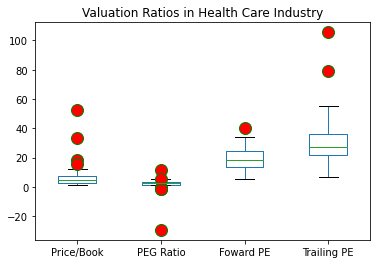

In [6]:
#formating fliers 
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

combine.boxplot(column = columns, flierprops=flierprops,
               grid = False)

plt.title("Valuation Ratios in Health Care Industry")

plt.show()

## Calculating Outliers Scores

In [7]:
upper = {}

lower = {}

for column in columns:
    quartiles = combine[column].quantile([0.25, 0.5, 0.75])
    
    upperq = quartiles[0.75]
    lowerq = quartiles[0.25]
    
    upper[column] = upperq
    lower[column] = lowerq

In [9]:
# define function to score stocks 
def score(df):
    
    score = 0
    
    if df["Price/Book"] <= lower["Price/Book"]:
        score += 1       
    elif df["Price/Book"] >= upper["Price/Book"]:
        score -= 1 
        
    elif df["PEG Ratio"] <= lower["PEG Ratio"]:
        score += 1     
    elif df["PEG Ratio"] >= upper["PEG Ratio"]:
        score -= 1
        
    elif df["Foward PE"] <= lower["Foward PE"]:
        score += 1    
    elif df["Foward PE"] >= upper["Foward PE"]:
        score -= 1    
        
    elif df["Trailing PE"] <= lower["Trailing PE"]:
        score += 1     
    elif df["Trailing PE"] >= upper["Trailing PE"]:
        score -= 1    
        
    return score 

In [ ]:
combine["score"] = combine.apply(score, axis = 1)

In [94]:
undervalued = combine.sort_values(by = ["score", "PEG Ratio"], ascending = [False, True])
undervalued.head(10)

,Symbol,Name,Country,Exchange,Currency,Type,Isin,Sector,Price/Book,PEG Ratio,Foward PE,Trailing PE,Total Debt/Equity,score
30,OGN,Organon & Co,USA,NYSE,USD,Common Stock,US68622V1061,Health Care,NaN,-1.72,5.444215,6.654040,NaN,1
32,PKI,PerkinElmer Inc,USA,NYSE,USD,Common Stock,US7140461093,Health Care,2.446449,-1.29,22.709784,26.693956,64.325,1
16,DGX,Quest Diagnostics Incorporated,USA,NYSE,USD,Common Stock,US74834L1008,Health Care,2.722835,-0.98,17.540636,14.614328,73.082,1
24,LH,Laboratory Corporation of America Holdings,USA,NYSE,USD,Common Stock,US50540R4092,Health Care,2.098707,-0.88,13.400794,12.587326,62.838,1
11,CNC,Centene Corp,USA,NYSE,USD,Common Stock,US15135B1017,Health Care,1.939752,1.09,13.619873,25.397058,84.234,1
10,CI,Cigna Corp,USA,NYSE,USD,Common Stock,US1255231003,Health Care,2.218405,1.24,13.185261,15.717236,71.076,1
28,MRK,Merck & Company Inc,USA,NYSE,USD,Common Stock,US58933Y1055,Health Care,6.268733,1.28,14.570861,18.243780,68.318,1
9,CAH,Cardinal Health Inc,USA,NYSE,USD,Common Stock,US14149Y1082,Health Care,NaN,1.48,12.676236,NaN,NaN,1
6,BIO,Bio-Rad Laboratories Inc,USA,NYSE,USD,Common Stock,US0905722072,Health Care,1.431616,1.63,26.891320,NaN,NaN,1
2,ABC,AmerisourceBergen,USA,NYSE,USD,Common Stock,US03073E1055,Health Care,NaN,1.74,13.572107,21.303482,9435.978,1


## Loop to Extract Data 

In [36]:
symbols = undervalued["Symbol"].head(10).to_list()

In [70]:
list_of_df = []

print("Begin Extraction of Ticker")

for symbol in symbols:
    
    extract = yf.Ticker(symbol)
    financials = extract.financials
    financials = financials.transpose()
    importance = ["Net Income", "Other Operating Expenses", "Research Development", "Gross Profit"]
    
    isolate = financials[importance]
    
    isolate.loc[:,"Symbol"] = symbol 
    
    list_of_df.append(isolate)
    
    print(f"{symbol} has been extracted")
    

Begin Extraction of Ticker


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


OGN has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


PKI has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


DGX has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


LH has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


CNC has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


CI has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


MRK has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


CAH has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


BIO has been extracted
ABC has been extracted


/var/folders/4g/011mcyls15v476x5cqlrm5sm0000gn/T/ipykernel_2243/1333826002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolate["Symbol"] = symbol


In [71]:
consolidated_financials = pd.concat(list_of_df, axis = 0)

In [96]:
consolidated_financials[consolidated_financials["Symbol"] == "ABC"]

,Net Income,Other Operating Expenses,Research Development,Gross Profit,Symbol
,,,,,
2022-09-30,1.698820e+09,0.0,0.0,8.334565e+09,ABC
2021-09-30,1.539932e+09,0.0,0.0,6.774434e+09,ABC
2020-09-30,-3.408716e+09,0.0,0.0,5.195364e+09,ABC
2019-09-30,8.553650e+08,0.0,0.0,5.138312e+09,ABC


In [89]:
for column in importance:
    consolidated_financials[column] = consolidated_financials[column].astype(str)
    consolidated_financials[column] = consolidated_financials[column].str.replace("None", '0')
    consolidated_financials[column] = consolidated_financials[column].astype(float)